# Problem 2


In [12]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt

First of all, let's recreate the input graph $G$:

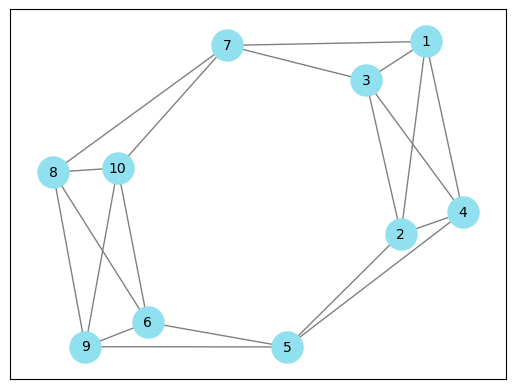

In [37]:
# Initializing G as an empty graph
G = nx.Graph()

# Defining V and E sets of nodes and edges
V = [i for i in range(1, 11)]

E = [(1, 2), (1, 3), (1, 4), (1, 7), (2, 3),
     (2, 4), (2, 5), (3, 4), (3, 7), (4, 5),
     (5, 6), (5, 9), (6, 8), (6, 9), (6, 10),
     (7, 8), (7, 10), (8, 9), (8, 10), (9, 10)]

# Populating the empty graph
G.add_nodes_from(V)
G.add_edges_from(E)

# Drawing the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels = True,
                 node_color = '#90e0ef', edge_color = 'gray',
                 node_size = 500, font_size = 10)
plt.show()